In [1]:
import numpy as np
import matplotlib.pyplot as plt
# NP Necessary imports

<h1>Problem 1</h1>

<h2>(a)</h2>

In [2]:
m_p = 1.007276466621 *(1.66053906660e-27)
# NP Mass of proton in kg
m_he = 4.002603254 *(1.66053906660e-27)
# NP Mass of 4He in kg
print('delta m/m: ' +format((m_he -4 *m_p)\
    *100 /(4 *m_p), '.2E') +' % (proton-proton chain)')
# NP Printing change in mass percent

delta m/m: -6.58E-01 % (proton-proton chain)


<h2>(b)</h2>

In [3]:
m_c = 12 *(1.66053906660e-27)
# NP Mass of 12C in kg
print('delta m/m: ' +format((m_c -3 *m_he)\
    *100 /(3 *m_he), '.2E') +' % (triple alpha)')
# NP Printing change in mass percent

delta m/m: -6.50E-02 % (triple alpha)


<h1>Problem 2</h1>

In [4]:
def f_V(m, T, V):
    '''Function to return the velocity distribution
    at a given temperature for a particle.
    Inputs:
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    m: Mass of the particle in kg. -float.
    T: Temperaure in Kelvin. -float
    V: Velcoities to run distribution over. -np.array
    Returns:
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    f_V: Velocity distribution for inputted parameters
    -np.array'''
    k = 1.38e-23
    # NP Boltzmann constant in kgs units
    f_V = V **2 *np.exp(-1 *(m *V **2) /(2 *k *T))\
        *4 *np.pi *((m) /(2 *np.pi *k *T)) **1.5
    return f_V

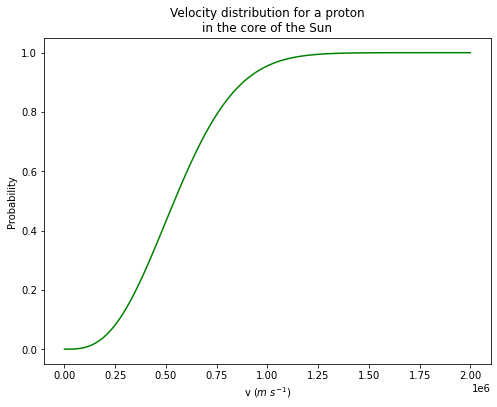

In [44]:
V = np.linspace(1, 2000000, 10000)
# NP Defining velocity grid to evaluate velocity distribution on
T_c = 15e6
# NP Central temperature of the Sun
v_distrib = f_V(m_p, 15 *10 **6, V)
# NP Calculating velocity distribution for the Sun
integrate_dis = np.array([np.trapz(v_distrib[V < i], V[V < i])\
    for i in V])
# NP Inegrating distribution to find probability distribution
f = plt.figure(figsize = [8, 6])
# NP Making figure larger
plt.plot(V, integrate_dis, 'g')
# NP Plotting velocity distribution
plt.xlabel(r'v ($m$ $s^{-1}$)')
plt.ylabel(r'Probability')
# NP Labeling axes
plt.title('Velocity distribution for a proton\n'
    'in the core of the Sun')
# NP Labeling plot
plt.savefig('/d/www/nikhil/public_html/ASTR5420/images/'\
    'sunvdistrib.png')
# NP Saving plot

In [45]:
percentiles = [0.9, 0.999]
# NP Defining percentiles to find speed for
args = np.array([np.argmin(np.abs(integrate_dis -i))\
    for i in percentiles])
# NP Finding index of speeds corresponding to percentiles
vs = V[args]
# NP Finding speeds corresponding to percentiles
eps = 8.85e-12
# NP Defining permetivitty of free space in mks units
rs = (10**15 *(1.6e-19)**2) /(2 *np.pi *eps *m_p\
    *vs**2)-3
# NP Calculating tunneling distance for different speeds
print('Tunneling distance for upper 10 percentile: '\
    +format(rs[0], '.2E') +' fm')
print('Tunneling distance for upper 0.1 percentile: '\
    +format(rs[1], '.2E') +' fm')
# NP Printing results

Tunneling distance for upper 10 percentile: 3.53E+02 fm
Tunneling distance for upper 0.1 percentile: 1.34E+02 fm


<h1>Problem 3</h1>

<h2>(a)</h2>

In [46]:
R_o = 6.957e8
# NP Radius of Sun
M_o = 2e30
# NP Mass of Sun
G = 6.67e-11
# NP Gravatational constant
k = 1.38e-23
# NP Boltzmann constant
T_ci = np.array([17e6, 11e6])
# NP Temperatures
M_cs = (k *R_o *T_ci /(0.65 *G *m_p *M_o))**5
# NP Calculating requires MS masses to achieve central
# NPtemperatures
print('Required mass for CNO cycle: ' +format(M_cs[0],\
    '.2E') +' Solar masses')
# NP Printing result

Required mass for CNO cycle: 1.80E+00 Solar masses


<h2>(b)</h2>

In [47]:
print('Required mass for proton-proton chain: ' +format\
    (M_cs[1], '.2E') +' Solar masses')
# NP Printing result

Required mass for proton-proton chain: 2.05E-01 Solar masses


<h2>(c)</h2>

In [48]:
R_J = 7.15e7
# NP Radius of Jupiter
T_d = 2e6
# NP Temperature for deuterium fusion
M_J = 1.90e27
# NP Mass of Jupiter
M_bd = (k *R_J *T_d) /(G *0.65 *m_p *M_J)
# NP Calulating mass required for deuterium fusion
print('Brown dwarf minimum mass: ' +format(M_bd, '.2E')\
    +' Jupiter masses')
# NP Printing result

Brown dwarf minimum mass: 1.43E+01 Jupiter masses


<h2>(d)</h2>

In [49]:
T_he = 500e6
# NP Temperature for triple alpha process
M_he = ((k *R_o *T_he *(0.8) **(1/3)) /(65 *G *m_p *M_o))\
    **(.75)
# NP Calculating mass for deuterium fusion
print('Mass of core needed for deuterium fusion: '\
    +format(M_he, '.2E') +' Solar masses')
# NP Printing result

Mass of core needed for deuterium fusion: 4.13E-01 Solar masses


<h1>Problem 4</h1>

<h2>(a)</h2>

In [50]:
T_c = 11e6
# NP Central temperature in K
rho_c = 25 *1000
# NP Central density in kg m^-3
X = 0.74
# NP Hydrogen fraction
Y = 0.26
# NP Helium fraction
mu = 1 /(X +Y /4)
# Equation 5.127
print('mu: ' +format(mu, '.2E'))
# NP Printing result
P_c = rho_c *k *T_c /(mu *m_p)
print('P_c: ' +format(P_c, '.2E') +' Nm^-2')

mu: 1.24E+00
P_c: 1.83E+15 Nm^-2


In [51]:
dr = 10 **-5 *R_o
# NP Radius step
T = [T_c]
# NP Initial temperature array
M = [0]
# NP Inital mass array
rho = [rho_c]
# NP Initial density array
L = [0]
# NP Initial luminosity array
R = [0]
# NP Inital radius array
g = [0]
# NP Inital surface gravity array
P = [P_c]
# NP Inital pressure array
i = 0
# NP Iterator value
L_o = 3.828e26
# NP Solar Luminosity

In [52]:
while(T[i] > 3000):
# NP Iterating until temperature drops below 3000 K
    R.append(R[i]+dr)
    # NP updating radius
    M.append(M[i] +rho[i] *4 *np.pi *R[i+1]**2 *dr)
    # NP Updating mass
    T.append(T[i] -((2/5) *(rho[i] *G *M[i+1]\
        *T[i] *dr)/(P[i] *R[i+1]**2)))
    # NP Updating temperature
    en = 2.4 *(rho[i] /1000) *X**2 /((T[i+1] /\
        (10 **9)) **(2/3)) *np.exp(-3.38/\
        (T[i+1]/(10**9)) **(1/3))
    # NP Calculating energy per unit mass for a shell
    L.append(L[i] +4*np.pi*R[i+1]**2*dr *rho[i] *en)
    # NP Updating Luminosity
    g.append(G *M[i+1]/(R[i+1]**2))
    # NP Updating surface gravity
    P.append(P[i] -rho[i] *g[i+1]*dr)
    # NP Updating pressure
    rho.append(mu *m_p *P[i+1] /(k *T[i+1]))
    # NP Updating density
    i += 1
    # NP Increasing step
R = np.array(R)
M = np.array(M)
T = np.array(T)
rho = np.array(rho)
P = np.array(P)
g = np.array(g)
L = np.array(L)
# NP Converting lists to arrays at the end

In [59]:
print('Final radius: ' +format(R[len(R)-1] /R_o, '.2E') +' R_o')
print('Final mass: ' +format(M[len(M)-1] /M_o, '.2E') +' M_o')
print('Final luminosity: ' +format(L[len(L)-1] /L_o, '.2E') +' L_o')

Final radius: 4.90E-01 R_o
Final mass: 3.47E-01 M_o
Final luminosity: 3.31E-02 L_o


<h2>(b)</h2>

In [69]:
R_p = (M[len(M)-1] /M_o) **0.8
# NP Calculating predicted radius from MS relation
print('Predicted R: ' +format(R_p, '.2E') +' R_o')
# NP Printing result
L_p = (M[len(M)-1] /M_o) **3.5
# NP Calculating predicted luminosity from MS relation
print('Predicted L: ' +format(L_p, '.2E') +' L_o')
# NP Printing result

Predicted R: 4.29E-01 R_o
Predicted L: 2.46E-02 L_o


<h2>(c)</h2>

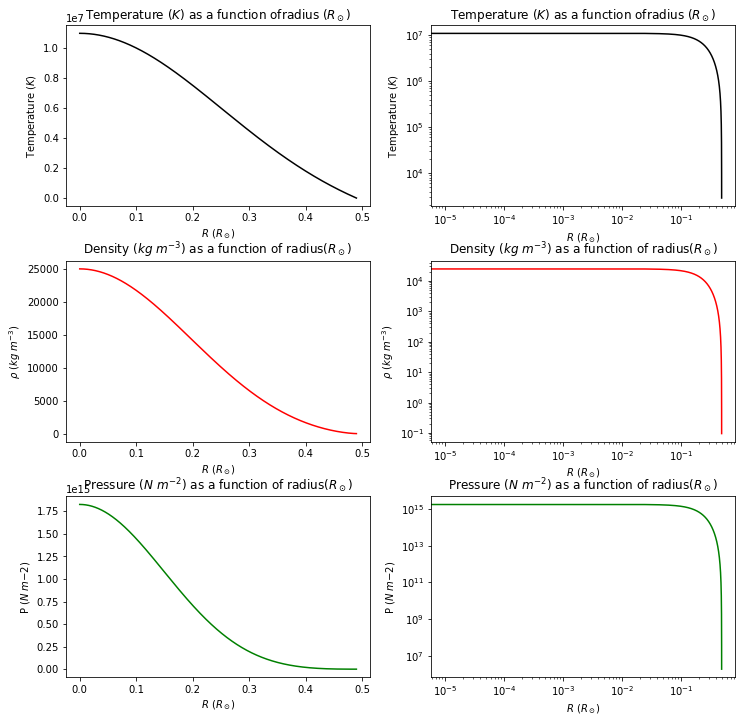

In [140]:
plt.figure(figsize = [12, 12])
# NP Making figure larger
plt.subplots_adjust(hspace=.3)
plt.subplot(3, 2, 1)
# NP First plot
plt.title(r'Temperature $(K)$ as a function of'
    'radius $(R_\odot)$')
plt.plot(R/R_o, T, 'k')
plt.xlabel(r'$R$ $(R_\odot)$')
plt.ylabel('Temperature $(K)$')
plt.subplot(3, 2, 2)
# NP Second plot
plt.title(r'Temperature $(K)$ as a function of'
    'radius $(R_\odot)$')
plt.plot(R/R_o, T, 'k')
plt.xlabel(r'$R$ $(R_\odot)$')
plt.ylabel('Temperature $(K)$')
plt.yscale('log')
plt.xscale('log')
plt.subplot(3, 2, 3)
# NP Third plot
plt.title(r'Density $(kg$ $m^{-3})$ as a function of radius'
    '$(R_\odot)$')
plt.plot(R/R_o, rho, 'r')
plt.xlabel(r'$R$ $(R_\odot)$')
plt.ylabel(r'$\rho$ $(kg$ $m^{-3})$')
plt.subplot(3, 2, 4)
# NP Fourth plot
plt.title(r'Density $(kg$ $m^{-3})$ as a function of radius'
    '$(R_\odot)$')
plt.plot(R/R_o, rho, 'r')
plt.xlabel(r'$R$ $(R_\odot)$')
plt.ylabel(r'$\rho$ $(kg$ $m^{-3})$')
plt.yscale('log')
plt.xscale('log')
plt.subplot(3, 2, 5)
# NP Fifth plot
plt.title(r'Pressure $(N$ $m^{-2})$ as a function of radius'
    '$(R_\odot)$')
plt.plot(R/R_o, P, 'g')
plt.xlabel(r'$R$ $(R_\odot)$')
plt.ylabel('P $(N$ $m{-2})$')
plt.subplot(3, 2, 6)
# NP Sixth plot
plt.title(r'Pressure $(N$ $m^{-2})$ as a function of radius'
    '$(R_\odot)$')
plt.plot(R/R_o, P, 'g')
plt.xlabel(r'$R$ $(R_\odot)$')
plt.ylabel('P $(N$ $m{-2})$')
plt.yscale('log')
plt.xscale('log')
plt.savefig('/d/www/nikhil/public_html/ASTR5420/images/'
    'tpPmlrelations1.png')
# NP Saving figure

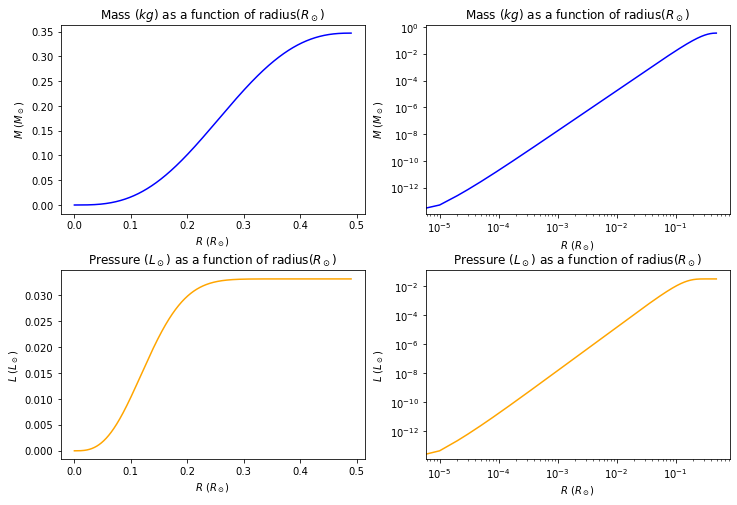

In [145]:
plt.figure(figsize = [12, 8])
# NP Setting figure size
plt.subplots_adjust(hspace=.3)
# NP Adjusting figure spacing
plt.subplot(2, 2, 1)
# NP First plot
plt.title(r'Mass $(kg)$ as a function of radius'
    '$(R_\odot)$')
plt.plot(R/R_o, M/M_o, 'b')
plt.xlabel(r'$R$ $(R_\odot)$')
plt.ylabel('$M$ $(M_\odot)$')
plt.subplot(2, 2, 2)
# NP Second plot
plt.title(r'Mass $(kg)$ as a function of radius'
    '$(R_\odot)$')
plt.plot(R/R_o, M/M_o, 'b')
plt.xlabel(r'$R$ $(R_\odot)$')
plt.ylabel('$M$ $(M_\odot)$')
plt.yscale('log')
plt.xscale('log')
plt.subplot(2, 2, 3)
# NP Third plot
plt.title(r'Pressure $(L_\odot)$ as a function of radius'
    '$(R_\odot)$')
plt.plot(R/R_o, L/L_o, color = 'orange')
plt.xlabel(r'$R$ $(R_\odot)$')
plt.ylabel('$L$ $(L_\odot)$')
plt.subplot(2, 2, 4)
# NP Fourth plot
plt.title(r'Pressure $(L_\odot)$ as a function of radius'
    '$(R_\odot)$')
plt.plot(R/R_o, L/L_o, color = 'orange')
plt.xlabel(r'$R$ $(R_\odot)$')
plt.ylabel('$L$ $(L_\odot)$')
plt.xscale('log')
plt.yscale('log')
plt.savefig('/d/www/nikhil/public_html/ASTR5420/images/'
    'tpPmlrelations2.png')
# NP Saving figure

<h2>(d)</h2>

In [147]:
T_c = 11e6 *1.1
# NP Central temperature in K
rho_c = 25 *1000
# NP Central density in kg m^-3
X = 0.74
# NP Hydrogen fraction
Y = 0.26
# NP Helium fraction
mu = 1 /(X +Y /4)
# Equation 5.127
# NP Printing result
P_c = rho_c *k *T_c /(mu *m_p)
dr = 10 **-5 *R_o
# NP Radius step
T = [T_c]
# NP Initial temperature array
M = [0]
# NP Inital mass array
rho = [rho_c]
# NP Initial density array
L = [0]
# NP Initial luminosity array
R = [0]
# NP Inital radius array
g = [0]
# NP Inital surface gravity array
P = [P_c]
# NP Inital pressure array
i = 0
# NP Iterator value
while(T[i] > 3000):
# NP Iterating until temperature drops below 3000 K
    R.append(R[i]+dr)
    # NP updating radius
    M.append(M[i] +rho[i] *4 *np.pi *R[i+1]**2 *dr)
    # NP Updating mass
    T.append(T[i] -((2/5) *(rho[i] *G *M[i+1]\
        *T[i] *dr)/(P[i] *R[i+1]**2)))
    # NP Updating temperature
    en = 2.4 *(rho[i] /1000) *X**2 /((T[i+1] /\
        (10 **9)) **(2/3)) *np.exp(-3.38/\
        (T[i+1]/(10**9)) **(1/3))
    # NP Calculating energy per unit mass for a shell
    L.append(L[i] +4*np.pi*R[i+1]**2*dr *rho[i] *en)
    # NP Updating Luminosity
    g.append(G *M[i+1]/(R[i+1]**2))
    # NP Updating surface gravity
    P.append(P[i] -rho[i] *g[i+1]*dr)
    # NP Updating pressure
    rho.append(mu *m_p *P[i+1] /(k *T[i+1]))
    # NP Updating density
    i += 1
    # NP Increasing step
R = np.array(R)
M = np.array(M)
T = np.array(T)
rho = np.array(rho)
P = np.array(P)
g = np.array(g)
L = np.array(L)
# NP Converting lists to arrays at the end
print('Final radius: ' +format(R[len(R)-1] /R_o, '.2E') +' R_o')
print('Final mass: ' +format(M[len(M)-1] /M_o, '.2E') +' M_o')
print('Final luminosity: ' +format(L[len(L)-1] /L_o, '.2E') +' L_o')

Final radius: 5.14E-01 R_o
Final mass: 4.00E-01 M_o
Final luminosity: 5.94E-02 L_o


In [148]:
T_c = 11e6
# NP Central temperature in K
rho_c = 25 *1000 *1.1
# NP Central density in kg m^-3
X = 0.74
# NP Hydrogen fraction
Y = 0.26
# NP Helium fraction
mu = 1 /(X +Y /4)
# Equation 5.127
# NP Printing result
P_c = rho_c *k *T_c /(mu *m_p)
dr = 10 **-5 *R_o
# NP Radius step
T = [T_c]
# NP Initial temperature array
M = [0]
# NP Inital mass array
rho = [rho_c]
# NP Initial density array
L = [0]
# NP Initial luminosity array
R = [0]
# NP Inital radius array
g = [0]
# NP Inital surface gravity array
P = [P_c]
# NP Inital pressure array
i = 0
# NP Iterator value
while(T[i] > 3000):
# NP Iterating until temperature drops below 3000 K
    R.append(R[i]+dr)
    # NP updating radius
    M.append(M[i] +rho[i] *4 *np.pi *R[i+1]**2 *dr)
    # NP Updating mass
    T.append(T[i] -((2/5) *(rho[i] *G *M[i+1]\
        *T[i] *dr)/(P[i] *R[i+1]**2)))
    # NP Updating temperature
    en = 2.4 *(rho[i] /1000) *X**2 /((T[i+1] /\
        (10 **9)) **(2/3)) *np.exp(-3.38/\
        (T[i+1]/(10**9)) **(1/3))
    # NP Calculating energy per unit mass for a shell
    L.append(L[i] +4*np.pi*R[i+1]**2*dr *rho[i] *en)
    # NP Updating Luminosity
    g.append(G *M[i+1]/(R[i+1]**2))
    # NP Updating surface gravity
    P.append(P[i] -rho[i] *g[i+1]*dr)
    # NP Updating pressure
    rho.append(mu *m_p *P[i+1] /(k *T[i+1]))
    # NP Updating density
    i += 1
    # NP Increasing step
R = np.array(R)
M = np.array(M)
T = np.array(T)
rho = np.array(rho)
P = np.array(P)
g = np.array(g)
L = np.array(L)
# NP Converting lists to arrays at the end
print('Final radius: ' +format(R[len(R)-1] /R_o, '.2E') +' R_o')
print('Final mass: ' +format(M[len(M)-1] /M_o, '.2E') +' M_o')
print('Final luminosity: ' +format(L[len(L)-1] /L_o, '.2E') +' L_o')

Final radius: 4.67E-01 R_o
Final mass: 3.31E-01 M_o
Final luminosity: 3.47E-02 L_o
